### Case Looqbox
- Olá pessoal, me chamo Felipe Teodoro e vou estar resolvendo o case de SQL e Python da Looqbox
- Vou deixar dividido pelas questões do case para que fique mais fácil de visualizar cada uma das seções
- Espero que gostem bastante do resultado e do modo de solução. Se tudo der certo, nos vemos futuramente...
- OBS: Eu decidi trazer tudo para o Python, para deixar o case em um único lugar, mas eu me conectei no banco de dados para fazer as queries do SQL, porém conectei no banco com o python e trouxe o resultado por aqui

In [ ]:
# Instalando bibliotecas
#!pip install mysql-connector-python pandas

In [ ]:
# Importando bibliotecas
import mysql.connector
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurações das bibliotecas

# Aumenta a largura para não quebrar a linha no meio
pd.set_option('display.width', 1000)

# Mostra o conteúdo completo da célula 
pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (12, 6)

warnings.filterwarnings('ignore')

---
### Conexão DB

In [ ]:
config = {
    'user': "looqbox-challenge",
    'password': "********",
    'host': "********",
    'database': "looqbox-challenge",
    'raise_on_warnings': True
}

---
### SQL test
- Nessa função teremos as respostas das questões 1, 2 e 3 do SQL test

In [ ]:
def SQL_test():
    """
    Função para conectar ao banco de dados MySQL e executar queries da atividade SQL test.
    """
    try:
        conexao = mysql.connector.connect(**config)
        if conexao.is_connected():
            # Questão 1: What are the 10 most expensive products in the company?
            query1 = """
            SELECT
                PRODUCT_NAME,
                PRODUCT_VAL
            FROM
                data_product
            ORDER BY
                PRODUCT_VAL DESC
            LIMIT 10; 
            """
            df = pd.read_sql(query1, conexao)
            if 'PRODUCT_VAL' in df.columns:
                df['PRODUCT_VAL'] = df['PRODUCT_VAL'].apply(lambda x: f"R$ {x:,.2f}")
            print("Top 10 produtos mais caros")
            display(df)

            # Questão 2: What sections do the 'BEBIDAS' and 'PADARIA' departments have?
            query2 = """
            SELECT 
                DISTINCT SECTION_NAME, DEP_NAME
            FROM data_product
            WHERE DEP_NAME IN ('BEBIDAS', 'PADARIA'); 
            """
            df2 = pd.read_sql(query2, conexao)
            print("\nSeções de BEBIDAS e PADARIA")
            display(df2)

            # Questão 3: What was the total sale of products (in $) of each Business Area in the first quarter of 2019?
            query3 = """
            SELECT
                store.BUSINESS_NAME,
                SUM(sales.SALES_VALUE) AS TOTAL_SALES
            FROM data_product_sales sales
            INNER JOIN data_store_cad store
                ON sales.STORE_CODE = store.STORE_CODE
            WHERE sales.DATE BETWEEN '2019-01-01' AND '2019-03-31'
            GROUP BY store.BUSINESS_NAME;
            """
            df3 = pd.read_sql(query3, conexao)
            if 'TOTAL_SALES' in df3.columns:
                df3['TOTAL_SALES'] = df3['TOTAL_SALES'].apply(lambda x: f"R$ {x:,.2f}")
            print("\nVenda total por área de negócio no primeiro trimestre de 2019")
            display(df3)
    except mysql.connector.Error as err:
        print(err)
    
    finally:
        # Fechando a conexão
        if 'conexao' in locals() and conexao.is_connected():
            conexao.close()
            print("\nConexão encerrada.")
SQL_test()

Top 10 produtos mais caros


,PRODUCT_NAME,PRODUCT_VAL
0,Whisky Escoces THE MACALLAN Ruby Garrafa 700ml com Caixa,R$ 741.99
1,Whisky Escoces JOHNNIE WALKER Blue Label Garrafa 750ml,R$ 735.90
2,Cafeteira Expresso 3 CORACOES Tres Modo Vermelho,R$ 499.00
3,Vinho Portugues Tinto Vintage QUINTA DO CRASTO Garrafa 750ml,R$ 445.90
4,Escova Dental Eletrica ORAL B D34 Professional Care 5000 110v,R$ 399.90
5,Champagne Rose VEUVE CLICQUOT PONSARDIM Garrafa 750ml,R$ 366.90
6,Champagne Frances Brut Imperial MOET Rose Garrafa 750ml,R$ 359.90
7,Conjunto de Panelas Allegra em Inox TRAMONTINA 5 Pecas Gratis Utensilios 5 Pecas,R$ 359.00
8,Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml,R$ 329.90
9,Champagne Frances Brut Imperial MOET & CHANDON Garrafa 750ml,R$ 315.90



Seções de BEBIDAS e PADARIA


,SECTION_NAME,DEP_NAME
0,BEBIDAS,BEBIDAS
1,VINHOS,BEBIDAS
2,DOCES-E-SOBREMESAS,PADARIA
3,QUEIJOS-E-FRIOS,PADARIA
4,CERVEJAS,BEBIDAS
5,PADARIA,PADARIA
6,REFRESCOS,BEBIDAS
7,GESTANTE,PADARIA



Venda total por área de negócio no primeiro trimestre de 2019


,BUSINESS_NAME,TOTAL_SALES
0,Varejo,"R$ 81,032,347.65"
1,Farma,"R$ 81,776,691.73"
2,Atacado,"R$ 80,384,884.60"
3,Posto,"R$ 32,072,326.40"
4,Proximidade,"R$ 80,171,122.80"



Conexão encerrada.


---
### Cases


#### Case 1
1) The Dev Team was tired of developing the same old queries just varying the filters accordingly to their boss demands.

In [ ]:
def retrieve_data(product_code, store_code, date):
    """
    Essa função serve para buscar dados de vendas filtrando por código do produto, código da loja e intervalo de datas.
    Trouxe aqui os argumentos e o retorno esperado para facilitar o uso da função por times externos
    Args:
        product_code (int): Código do produto.
        store_code (int): Código da loja.
        date (list): Lista com data inicial e final. Ex: ['2019-01-01', '2019-01-31']
        
    Returns:
        pd.DataFrame: DataFrame contendo todas as colunas da tabela filtrada.
    """

    # Criação da query padrão com os filtros
    # Ao colocar %s eu vou garantir que os dados estejam no formato correto
    query = """
    SELECT * FROM data_product_sales
    WHERE
        PRODUCT_CODE = %s
        AND STORE_CODE = %s
        AND DATE BETWEEN %s AND %s;
    """
    
    # Parametros
    params = (product_code, store_code, date[0], date[1])

    try:
        conexao = mysql.connector.connect(**config)
        df = pd.read_sql(query, conexao, params=params)
        return df
    except mysql.connector.Error as err:
        print(err)
        return pd.DataFrame() # Retorna vazio em caso de erro para não quebrar o código
        
    finally:
        if 'conexao' in locals() and conexao.is_connected():
            conexao.close()


#### Códigos disponíveis
- Quandoo fui fazer os testes, acabou que dava muito erro por não ter o código correto, então vou deixar uma tabela abaixo com os códigos disponíveis para teste 

In [ ]:
def listar_codigos_disponiveis():
    """
    Função auxiliar para consultar e exibir códigos de Lojas e Produtos
    disponíveis no banco de dados, facilitando o uso da função retrieve_data.
    """
    conexao = None
    try:
        conexao = mysql.connector.connect(**config)
        print(("Use estes códigos para testar a função retrieve_data"))

        # Buscando Lojas 
        query_lojas = """
        SELECT STORE_CODE, STORE_NAME, BUSINESS_NAME 
        FROM data_store_cad 
        ORDER BY STORE_CODE ASC
        """
        df_lojas = pd.read_sql(query_lojas, conexao)
        
        print((f"Lojas Disponíveis: {len(df_lojas)}"))
        
        # Mostrando dataframe formatado
        display(df_lojas.head(10)) 

        # Buscando Produtos
        query_produtos = """
        SELECT PRODUCT_COD, PRODUCT_NAME, SECTION_NAME
        FROM data_product 
        ORDER BY PRODUCT_COD ASC 
        LIMIT 10
        """
        df_produtos = pd.read_sql(query_produtos, conexao)
        
        print(("\nProdutos Disponíveis Top 10"))
        display(df_produtos)

    except mysql.connector.Error as err:
        print({err})
    finally:
        if conexao and conexao.is_connected():
            conexao.close()

# Executar a listagem
listar_codigos_disponiveis()

Use estes códigos para testar a função retrieve_data
Lojas Disponíveis: 20


,STORE_CODE,STORE_NAME,BUSINESS_NAME
0,1,Sao Paulo,Varejo
1,2,Chicago,Varejo
2,3,Roma,Varejo
3,4,Tokio,Varejo
4,5,Paris,Proximidade
5,6,Berlin,Proximidade
6,7,New York,Proximidade
7,8,Belem,Proximidade
8,9,London,Farma
9,10,Hong Kong,Farma



Produtos Disponíveis Top 10


,PRODUCT_COD,PRODUCT_NAME,SECTION_NAME
0,10,Acido Tranexamico 250mg Generico EMS 12 Comprimidos,CIRCULAÇÃO
1,11,Bissulfato de Clopidogrel 75mg Generico Teuto 30 Comprimidos,CIRCULAÇÃO
2,12,Cloridrato de Amiodarona 200mg Generico Biosintetica 30 Comprimidos,CIRCULAÇÃO
3,13,Acido Tranexâmico 250mg Generico Legrand 12 Comprimidos,CIRCULAÇÃO
4,14,Cloridrato Oximetazolina Adulto 5mg/ml Genérico EMS 30ml,GRIPES E RESFRIADOS
5,15,Carbocisteína Adulto 50mg/Ml Genérico Cimed 100ml Xarope,GRIPES E RESFRIADOS
6,16,Aguardente NEGA FULO TERRACOTA Garrafa 700ml,BEBIDAS
7,17,"Guaifenesina 13,3mg/mL Genérico Xarope Sabor Cereja Neo Química 120ml",GRIPES E RESFRIADOS
8,18,Vinho Brasileiro Tinto Cabernet Sauvignon MARCUS JAMES Garrafa 375ml,VINHOS
9,19,Carbocisteína Xarope Genérico Prati 100ml,GRIPES E RESFRIADOS


Testando a função

In [ ]:
# Definindo as variáveis de teste
test_product = 10  # Exemplo de código
test_store = 10     # Exemplo de loja
test_dates = ['2019-01-01', '2019-03-31']

data = retrieve_data(test_product, test_store, test_dates)

print(f"Registros encontrados: {len(data)}")
if not data.empty:
    display(data.head())
else:
    print("Nenhum dado encontrado com esses filtros, é preciso tentar outro código.")

Registros encontrados: 90


,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
0,10,10,2019-01-01,2386.15,65.0
1,10,10,2019-01-02,4368.49,119.0
2,10,10,2019-01-03,3854.55,105.0
3,10,10,2019-01-04,3671.00,100.0
4,10,10,2019-01-05,3010.22,82.0


VISUALIZAÇÃO


90 registros encontrados

  STORE_CODE  PRODUCT_CODE        DATE  SALES_VALUE  SALES_QTY
0         10            10  2019-01-01      2386.15       65.0
1         10            10  2019-01-02      4368.49      119.0
2         10            10  2019-01-03      3854.55      105.0
3         10            10  2019-01-04      3671.00      100.0
4         10            10  2019-01-05      3010.22       82.0

Gráfico de evolução


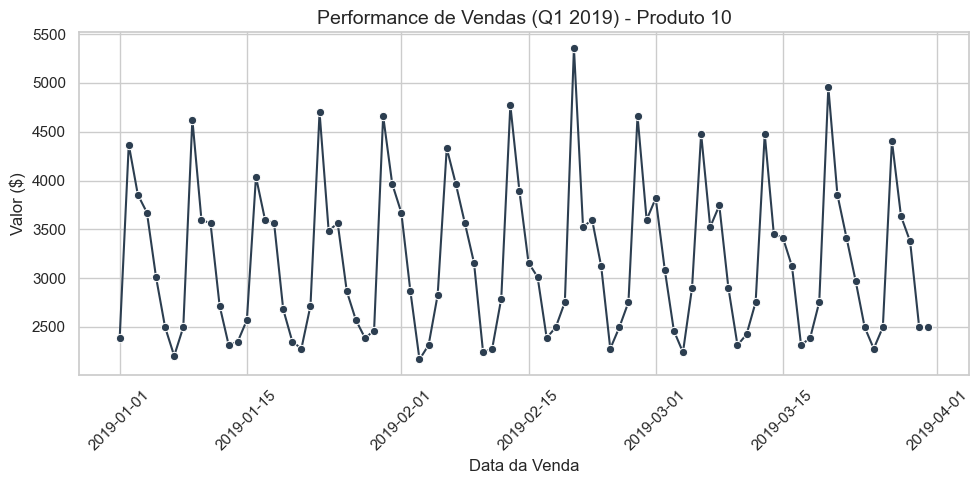

In [ ]:
if not data.empty:
    print(f"{len(data)} registros encontrados\n")
    print(data.head())

    # Aqui vou trazer um visual, para realçar a análise dos dados
    # Convertendo para datetime para garantir a ordem correta no gráfico
    data['DATE'] = pd.to_datetime(data['DATE'])
    
    plt.figure(figsize=(10, 5))
    
    # Gráfico de linha mostrando a evolução
    sns.lineplot(data=data, x='DATE', y='SALES_VALUE', marker='o', color='#2c3e50')
    
    plt.title(f'Performance de Vendas (Q1 2019) - Produto {test_product}', fontsize=14)
    plt.xlabel('Data da Venda')
    plt.ylabel('Valor ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    print("\nGráfico de evolução")
    plt.show()
    
else:
    print("Nenhum dado encontrado com os filtros selecionados.")

---
#### Case 2
2) A brand new client sent you two ready-to-go queries. Those are listed below:


In [ ]:
def case_2():
    """
    Processa dados legados usando Pandas para filtros e agregação.
    Objetivo: Calcular Ticket Médio do Q4 2019.
    """
    try:
        conexao = mysql.connector.connect(**config)

        # Aqui eu vou extrair as queries legado que não podem ser alteradas
        query_store_info = """
        SELECT
            STORE_CODE,
            STORE_NAME,
            START_DATE,
            END_DATE,
            BUSINESS_NAME,
            BUSINESS_CODE
        FROM data_store_cad
        """

        query_store_sales ="""
        SELECT
            STORE_CODE,
            DATE,
            SALES_VALUE,
            SALES_QTY
        FROM data_store_sales
        WHERE DATE BETWEEN '2019-10-01' AND '2019-12-31'
        """

        # Trazendo os dados para Python
        try:
            df_store = pd.read_sql(query_store_info, conexao)
            df_sales = pd.read_sql(query_store_sales, conexao)
        except Exception as e:
            print(e)
            return
        
        # Filtro de Data
        df_sales['DATE'] = pd.to_datetime(df_sales['DATE'])
        start_date = pd.to_datetime('2019-01-01')
        end_date = pd.to_datetime('2019-12-31')

        # Mask de filtro
        mask = (df_sales['DATE'] >= start_date) & (df_sales['DATE'] <= end_date)
        df_sales_filtrado = df_sales.loc[mask].copy()

        # Fazendo um join entre as duas tabelas
        df_merge = pd.merge(df_sales_filtrado, df_store, on='STORE_CODE', how='inner')

        # Agrupando por loja e área de negócio e somando os valores
        df_agrupado = df_merge.groupby(['STORE_NAME','BUSINESS_NAME'])[['SALES_VALUE', 'SALES_QTY']].sum().reset_index()

        # Eu assumi que TM = Ticket médio e Ticket médio = Vendas Totais / Quantidade Total
        df_agrupado['TM'] = df_agrupado['SALES_VALUE'] / df_agrupado['SALES_QTY'] 
        
        df_final = df_agrupado[['STORE_NAME', 'BUSINESS_NAME', 'TM']].copy()
        df_final.columns = ['Loja', 'Categoria', 'TM']

        # Arrendondar 2 casas decimais
        df_final['TM'] = df_final['TM'].round(2)

        # Ordenando por Loja para ficar igual como tá no Github
        df_final = df_final.sort_values(by='Loja',).reset_index(drop=True)
        display(df_final)
    except mysql.connector.Error as err:
        print(err)
    finally:
        if 'conexao' in locals() and conexao.is_connected():
            conexao.close()
case_2() 

,Loja,Categoria,TM
0,Bahia,Atacado,15.39
1,Bangkok,Posto,13.67
2,Belem,Proximidade,15.37
3,Berlin,Proximidade,15.39
4,Buenos Aires,Atacado,15.39
5,Chicago,Varejo,15.53
6,Dubai,Atacado,15.39
7,Hong Kong,Farma,26.35
8,London,Farma,28.99
9,Madri,Farma,29.03


---
#### Case 3.1
3) Building your own visualization
- Tipo de visualização escolhida: ScatterPlot
- Justificativa: Então pessoal, aqui eu vi uma oportunidade de trazer o Scatterplot com uma linha de regressão linear para entendermos melhor a seguinte questão "Quanto maior a nota de um filme, maior a receita dele?". Então eu vou poder saber, de acordo com os dados que temos, se filmes mais bem avaliados geram mais receita, podendo justificar que deve ser feito um bom investimento na qualidade do filme ou não necessariamente, consigo dizer se as críticas especializadas estão de acordo com a avaliação do público, por meio da coluna Metascore, além de identificar outliers, para entender se temos filmes que foram nota 10 e não tiveram boa receita ou até mesmo filmes que foram ruins, mas obtiveram boa receita e por fim posso entender melhor filmes que se destacam tanto em nota quanto em faturamente para se tornar um benchmark de sucesso de bilheteria, seria até possível fazer uma análise mais detalhada para saber quais são as variáveis que influenciaram aquele filme a estar com boas avaliações e receita, algo que seria extremamente importante saber para um gerente de filmes e pessoas da área

Dados carregados inicialemente: 1000 VS Dados válidos para plotagem: 872


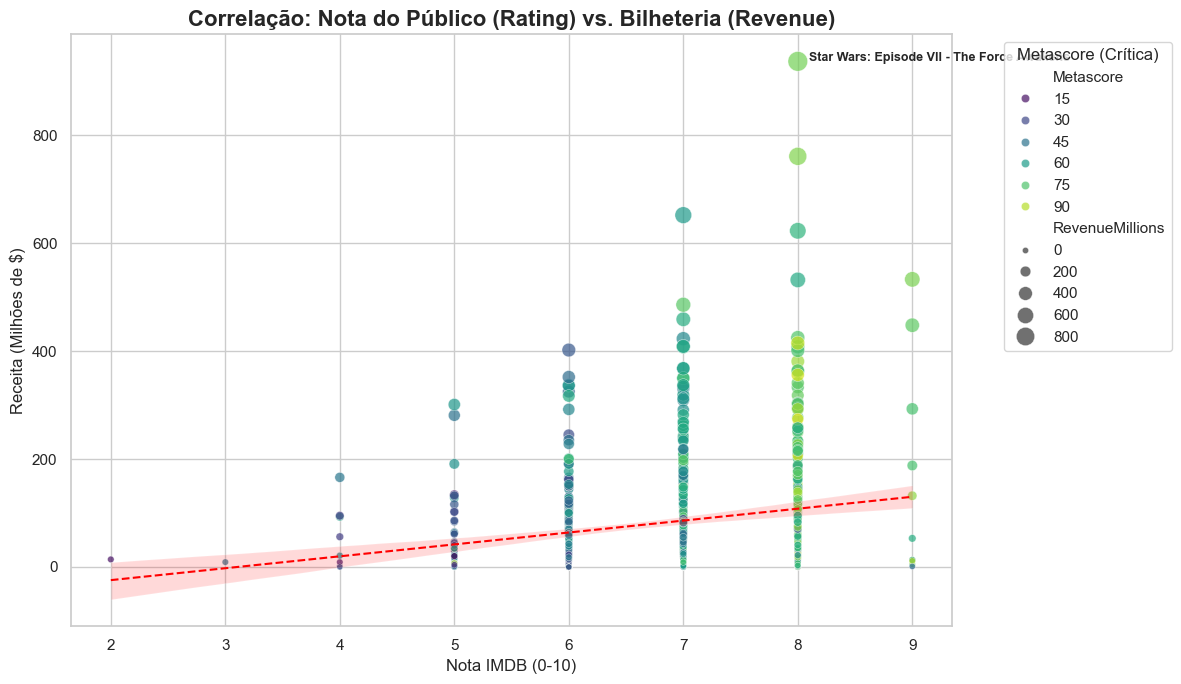

Correlação entre Rating e RevenueMillions: 0.20


In [ ]:
def case_3_V1():
    """
    Gera visualização  de correlação (Nota vs Receita) usando Seaborn.
    """
    try:
        conexao = mysql.connector.connect(**config)
        
        query = """
        SELECT Title, Rating, RevenueMillions, Metascore
        FROM IMDB_movies
        """

        # Transformando o resultado em um DataFrame para usarmos python
        df = pd.read_sql(query, conexao)

        df_limpo = df.dropna(subset=['RevenueMillions', 'Rating'])

        print(f"Dados carregados inicialemente: {len(df)} VS Dados válidos para plotagem: {len(df_limpo)}")

        plt.figure(figsize=(12, 7))

        # Scatterplot
        scatter = sns.scatterplot(
            data = df_limpo,
            x='Rating',
            y='RevenueMillions',
            hue='Metascore',
            palette='viridis',
            size = 'RevenueMillions',
            sizes=(20, 200),
            alpha=0.7
        )

        # Linha de tendência (Aqui vai ser como se fosse uma linha de regressão)
        sns.regplot(
            data = df_limpo,
            x='Rating',
            y='RevenueMillions',
            scatter=False,
            color='red',
            line_kws={"linestyle": "--", "linewidth": 1.5, "label": "Tendência"}
        )

        # Customizações
        plt.title('Correlação: Nota do Público (Rating) vs. Bilheteria (Revenue)', fontsize=16, fontweight='bold')
        plt.xlabel('Nota IMDB (0-10)', fontsize=12)
        plt.ylabel('Receita (Milhões de $)', fontsize=12)
        plt.legend(title='Metascore (Crítica)', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Destacar o filme com maior receita 
        top_movie = df_limpo.loc[df_limpo['RevenueMillions'].idxmax()]
        plt.text(
            top_movie['Rating'] + 0.1, 
            top_movie['RevenueMillions'], 
            f"{top_movie['Title']}", 
            fontsize=9, 
            fontweight='bold'
        )

        plt.tight_layout()
        plt.show()

        # Trazer uma correlação 
        corr = df_limpo['Rating'].corr(df_limpo['RevenueMillions'])
        print(f"Correlação entre Rating e RevenueMillions: {corr:.2f}")
    except mysql.connector.Error as err:
        print(err)
    finally:
        if 'conexao' in locals() and conexao.is_connected():
            conexao.close()
case_3_V1()

### Análise do gráfico
- O número 0.2 nos diz que há uma fraca relação positiva entre nota do filme e a bilheteria, portanto apenas uma pequena parte da variação na receita é explicada pela nota do filme, então não existe essa de filme bom se vende sozinho, mas obviamente esse é apenas um dataset de treino, então existem inúmeras variáveis que explicam o sucesso de um filmee, como orçamento, marketing, elenco, etc. Além disso, vemos que filmes com melhores avaliações tendem a ter maiores notas críticas, então mesmo que as duas notas sejam boas, não necessariamente é garantido o sucesso de bilheteria 
- O gráfico mostra claramente que existem filmes excelentes e que não fizeram dinheiro, o que dilui a correlação.

----

#### Case 3.2
3) Building your own visualization
- Tipo de visualização escolhida: Heatmap
- Justificativa: Quis trazer uma matriz de correlação de Pearson cruzando as principais variáveis numéricas do dataset para encontrar possíveis padrões não tão óbvios. Ao analisar, considere cores mais quentes (vermelho) indicando forte correlação positiva.

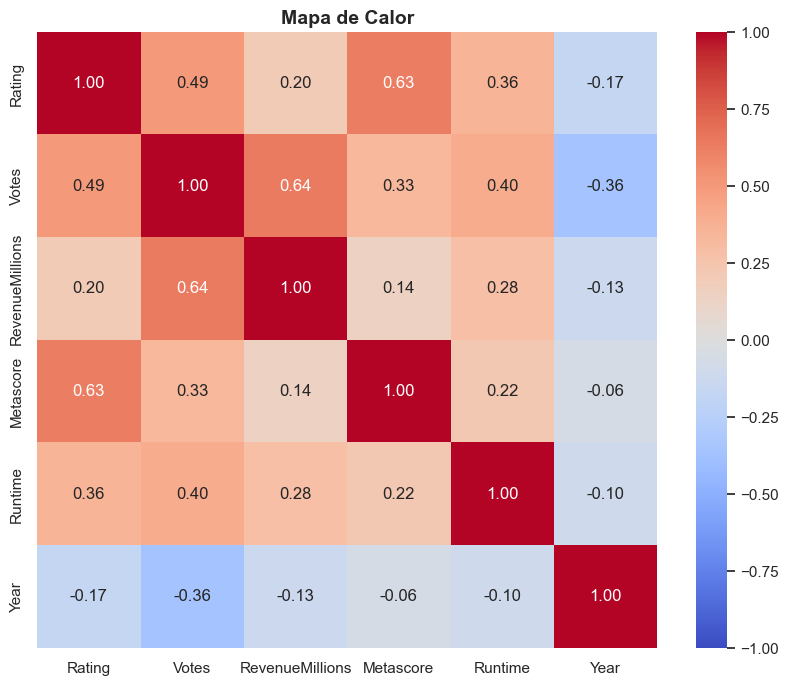

In [ ]:
def case_3_V2():
    """
    Aqui vou fazer uma análise exploratória para encontrar os verdadeiros drivers de receita.
    """
    try:
        conexao = mysql.connector.connect(**config)
        query = "SELECT * FROM IMDB_movies"
        df = pd.read_sql(query, conexao)
        
        # Selecionando apenas colunas numéricas
        cols_numericas = ['Rating', 'Votes', 'RevenueMillions', 'Metascore', 'Runtime', 'Year']
        df_corr = df[cols_numericas].dropna()
        
        plt.figure(figsize=(10, 8))
        heatmap = sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title('Mapa de Calor', fontsize=14, fontweight='bold')
        plt.show()

    except Exception as e:
        print(f"Erro na análise bônus: {e}")
    finally:
        if 'conexao' in locals() and conexao.is_connected():
            conexao.close()

case_3_V2()

### Análise Heatmap
- Analisando o Heatmap, vemos que a correlação entre Votes, que seria o engajamento e Revenue é de 0.64, portanto temos que o hype do filme vende mais que a qualidade
- A correlação entre Votes (Quantidade de Votos) e Revenue (Receita) é significativamente alta. Isso indica que o volume de discussão e popularidade é um indicador de sucesso financeiro muito mais preciso do que a nota do filme em si.
- Curiosamente, existe uma correlação moderada positiva entre Runtime (Duração) e Rating (Nota), sugerindo que filmes mais longos tendem a ser melhor avaliados, talvez por serem produções mais densas ou filmes épicos (Vingadores por exemplo), ai no caso teria que avaliar todo o contexto.
- Então se fossemos tentar prever bilheteria, seria interessante monitorar o que está sendo falado nas redes sociais, pois será mais eficiente para prever bilheteria do que focar apenas em críticas antecipadas. Um exemplo real e recente disso, mas não direcionado para filmes, foi o lançamento dos primeiros episódios da nova temporada de Stranger Things, que dominou todas as redes sociais antes do seu lançamento e na sua estreia (Até o Netflix travou em alguns usuários no dia do lançamento)
---

#### Case 3.3
3) Building your own visualization
- Tipo de visualização escolhida: Bar plot
- Justificativa: Percebi que na coluna original Actors continha múltiplos nomes em uma única célula, então decidi aplicar um simples processo de ETL utilizando a função .explode() do Pandas para separar os atores individualmente, permitindo uma análise granular de performance por artista.

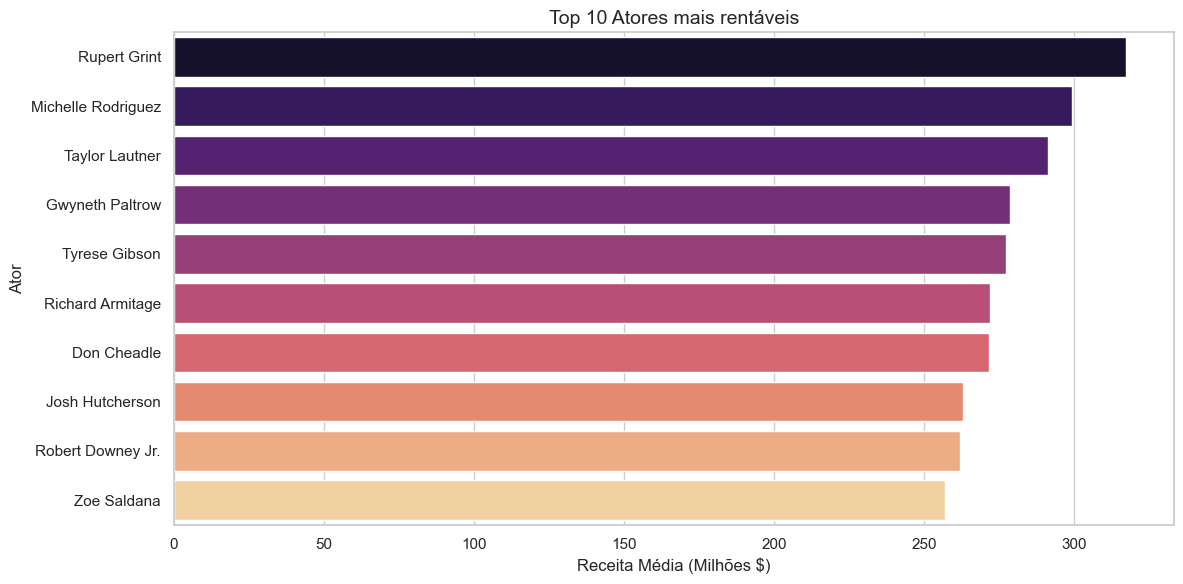

In [ ]:
def case_3_V3():
    """
    Aqui quis ir além e descobrir quem são os atores que trazem mais receita para os filmes??
    """
    try:
        conexao = mysql.connector.connect(**config)
        query = "SELECT * FROM IMDB_movies"
        df = pd.read_sql(query, conexao)

        # A coluna Actors vem uma lista de atores, então vou dividir isso para poder analisar de forma individual cada ator
        df_actors = df[['Title', 'Actors', 'RevenueMillions']].dropna()
        df_actors['Actors'] = df_actors['Actors'].str.split(',')
        df_exploded = df_actors.explode('Actors')
        
        # Limpar espaços em branco
        df_exploded['Actors'] = df_exploded['Actors'].str.strip()
        
        # Agrupar por ator e calcular média de receita
        # Vou pegar apenas atores que fizeram pelo menos 3 filmes para ter uma média mais confiável
        actor_stats = df_exploded.groupby('Actors').agg({
            'RevenueMillions': 'mean',
            'Title': 'count'
        }).reset_index()
        
        # Filtrando quem tem mais de 3 filmes
        top_actors = actor_stats[actor_stats['Title'] >= 3].sort_values(by='RevenueMillions', ascending=False).head(10)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(data=top_actors, x='RevenueMillions', y='Actors', palette='magma')
        plt.title('Top 10 Atores mais rentáveis', fontsize=14)
        plt.xlabel('Receita Média (Milhões $)')
        plt.ylabel('Ator')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print({e})
    finally:
        if 'conexao' in locals() and conexao.is_connected():
            conexao.close()

case_3_V3()

### Análise Barplot de atores com maior receita associada
- No gráfico acima eu quis trazer aqueles atores que trazem as melhores receitas para os filmes, portanto se eu fosse um roteirista, queria ter algum desses nomes no meu elenco
- O gráfico destaca os atores com maior Média de Receita por Filme considerando apenas aqueles com 3+ filmes na base para evitar distorções.
- Portanto a presença de nomes como Robert Downey Jr. no topo valida o conceito de atores considerados estrelas cuja simples presença no elenco reduz o risco financeiro do estúdio e garante uma base sólida de bilheteria de estreia.

#### E aí, gostou do que viu?
Estarei deixando algumas informações a mais caso queiram me conhecer melhor:
- Linkedin: [Linkedin](https://www.linkedin.com/in/felipe-teodoro-bandeira/)
- Github: [Github](https://github.com/Felipe-teodoro05)
- Email: teodorobfelipe@gmail.com